In [1]:
import pandas as pd
import numpy as np

# Below are usage from sklearn family that we can use
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Below are some examples of how we can leverage category_encoders and invoke required libraries as per our usage
# This is not exhaustive, just a representative list
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import BinaryEncoder
from category_encoders import HelmertEncoder
from category_encoders import TargetEncoder
from category_encoders import HashingEncoder
from category_encoders import WOEEncoder


import warnings
warnings.filterwarnings('ignore')

In [2]:
#ead xlxs file
df_gapmin=pd.read_csv("D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\gapminder.csv")

In [3]:
df_gapmin

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


In [4]:
df_gapmin.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [5]:
df_gapmin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [6]:
df_gapmin['Region']

0      Middle East & North Africa
1              Sub-Saharan Africa
2                         America
3           Europe & Central Asia
4             East Asia & Pacific
                  ...            
134                       America
135         Europe & Central Asia
136           East Asia & Pacific
137            Sub-Saharan Africa
138            Sub-Saharan Africa
Name: Region, Length: 139, dtype: object

In [7]:
#appears the region - is dicreet
df_gapmin['Region_new']=df_gapmin['Region'].astype('category')

In [8]:
df_gapmin['Region_new'].unique()

['Middle East & North Africa', 'Sub-Saharan Africa', 'America', 'Europe & Central Asia', 'East Asia & Pacific', 'South Asia']
Categories (6, object): ['America', 'East Asia & Pacific', 'Europe & Central Asia', 'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa']

In [9]:
df_gapmin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   population       139 non-null    float64 
 1   fertility        139 non-null    float64 
 2   HIV              139 non-null    float64 
 3   CO2              139 non-null    float64 
 4   BMI_male         139 non-null    float64 
 5   GDP              139 non-null    float64 
 6   BMI_female       139 non-null    float64 
 7   life             139 non-null    float64 
 8   child_mortality  139 non-null    float64 
 9   Region           139 non-null    object  
 10  Region_new       139 non-null    category
dtypes: category(1), float64(9), object(1)
memory usage: 11.3+ KB


In [10]:
df_gapmin.isnull().any()

population         False
fertility          False
HIV                False
CO2                False
BMI_male           False
GDP                False
BMI_female         False
life               False
child_mortality    False
Region             False
Region_new         False
dtype: bool

In [11]:
# the regions are in the CSV is categorical and discreet nominal categories
#One hot encoding  is the best possible way to encode 
one_hot_encoded_gapmin = pd.get_dummies(df_gapmin, columns = ['Region_new'])
one_hot_encoded_gapmin

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region,Region_new_America,Region_new_East Asia & Pacific,Region_new_Europe & Central Asia,Region_new_Middle East & North Africa,Region_new_South Asia,Region_new_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America,1,0,0,0,0,0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia,0,0,1,0,0,0
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific,0,1,0,0,0,0
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa,0,0,0,0,0,1


In [12]:
# Assigning numerical values to Region_new category  and storing in another column
df_gapmin['Region_new_cat'] = df_gapmin['Region_new'].cat.codes
df_gapmin

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region,Region_new,Region_new_cat
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa,Middle East & North Africa,3
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa,Sub-Saharan Africa,5
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America,America,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia,Europe & Central Asia,2
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific,East Asia & Pacific,1
...,...,...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America,America,0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia,Europe & Central Asia,2
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific,East Asia & Pacific,1
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa,Sub-Saharan Africa,5


In [93]:
use_cols=['quality','Alcohol','Malicacid']

In [94]:
df_wine_data=pd.read_csv("D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\wine_data_UCI.csv",usecols=use_cols)
df_wine_data

,quality,Alcohol,Malicacid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [95]:
df_wine_data.describe()


,quality,Alcohol,Malicacid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   quality    178 non-null    int64  
 1   Alcohol    178 non-null    float64
 2   Malicacid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


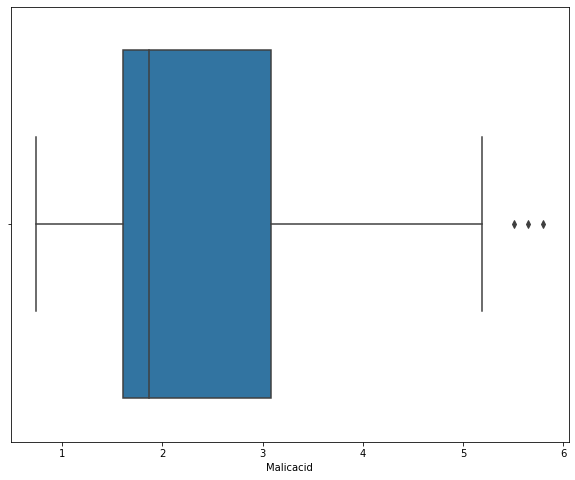

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Malicacid',data=df_wine_data)
plt.show()

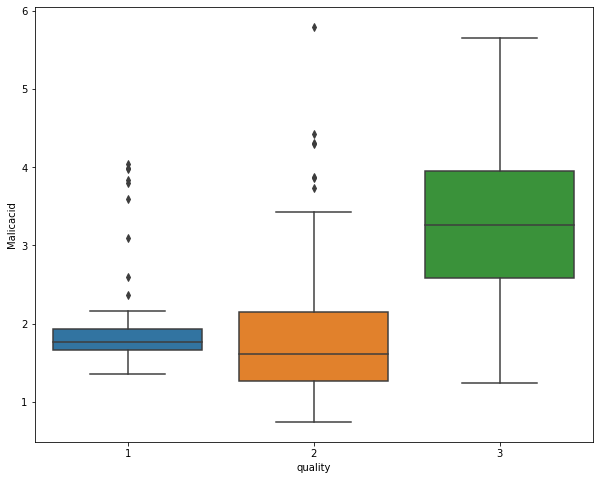

In [99]:
#no apprent way Malicacid relates to the quality
plt.figure(figsize=(10,8))
sns.boxplot(x='quality', y='Malicacid',data=df_wine_data)
plt.show()

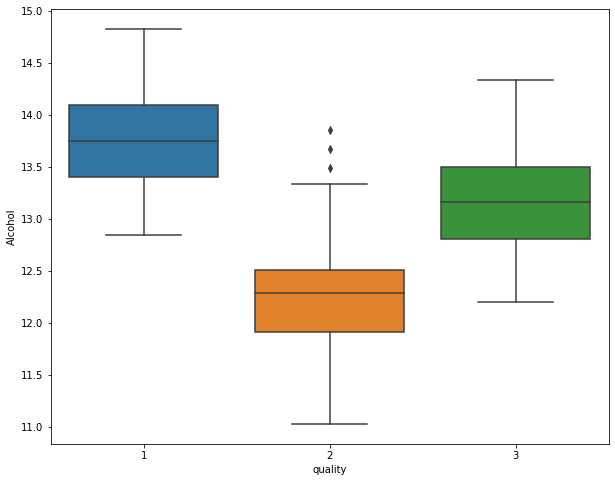

In [100]:
#no apprent way Alcohol relates to the quality
plt.figure(figsize=(10,8))
sns.boxplot(x='quality', y='Alcohol',data=df_wine_data)
plt.show()

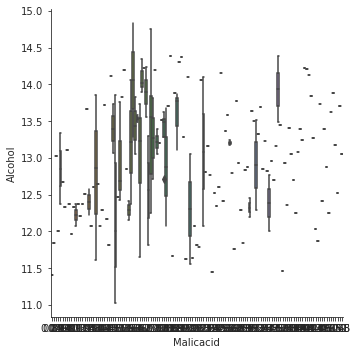

In [101]:
with sns.axes_style(style='ticks'):
    my_plot = sns.factorplot('Malicacid', 'Alcohol', data=df_wine_data, kind="box")
    my_plot.set_axis_labels('Malicacid', 'Alcohol') 
    
plt.show()

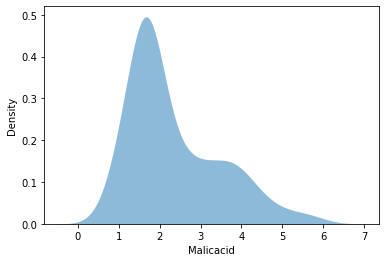

In [102]:
sns.kdeplot(
   data=df_wine_data, x="Malicacid",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

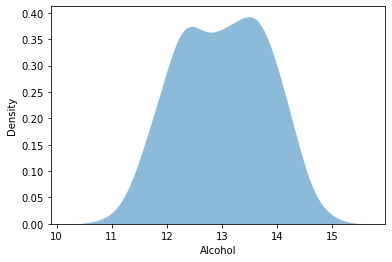

In [103]:
sns.kdeplot(
   data=df_wine_data, x="Alcohol",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

In [104]:
# both Alochol and Malicacid data follows a normalized distribution ...
# hence standardization should be cloce of scaling 

ALCOHOL=df_wine_data['Alcohol'].to_numpy()
MALICACID=df_wine_data['Malicacid'].to_numpy()

In [105]:
ALCOHOL,MALICACID

(array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
        13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
        14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
        13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
        13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
        14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
        13.74, 13.56, 14.22, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67,
        12.37, 12.17, 12.37, 13.11, 12.37, 13.34, 12.21, 12.29, 13.86,
        13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.33, 12.7 , 12.  ,
        12.72, 12.08, 13.05, 11.84, 12.67, 12.16, 11.65, 11.64, 12.08,
        12.08, 12.  , 12.69, 12.29, 11.62, 12.47, 11.81, 12.29, 12.37,
        12.29, 12.08, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.72,
        12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 12.08, 11.03, 11.82,
        12.42, 12.77, 12.  , 11.45, 11.56, 12.42, 13.05, 11.87, 12.07,
      

In [106]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit([ALCOHOL])
ALCOHOL=normalizer.transform([ALCOHOL])

In [107]:
normalizer = Normalizer().fit([MALICACID])
MALICACID=normalizer.transform([MALICACID])

In [108]:
ALCOHOL

array([[0.0818824 , 0.07595556, 0.07572539, 0.08268799, 0.07618573,
        0.08170977, 0.08280307, 0.08090418, 0.08533492, 0.07975334,
        0.08113435, 0.08124943, 0.07912038, 0.08487458, 0.08274553,
        0.07842987, 0.08228519, 0.07958071, 0.08165223, 0.07848741,
        0.08090418, 0.07440192, 0.07889021, 0.07394159, 0.07768182,
        0.07509243, 0.07704886, 0.07653098, 0.07981088, 0.08067401,
        0.07900529, 0.07814216, 0.07871758, 0.07917792, 0.07773937,
        0.07756674, 0.0764159 , 0.07509243, 0.07520751, 0.08182485,
        0.07802708, 0.07716394, 0.07986842, 0.07618573, 0.07509243,
        0.08176731, 0.08274553, 0.07998351, 0.08113435, 0.08021368,
        0.07509243, 0.07958071, 0.07952317, 0.07923546, 0.07906283,
        0.07802708, 0.08182485, 0.07647344, 0.07894775, 0.07117957,
        0.0709494 , 0.0727332 , 0.07866004, 0.07117957, 0.07002873,
        0.07117957, 0.07543768, 0.07117957, 0.07676115, 0.07025889,
        0.07071923, 0.07975334, 0.07762428, 0.07

In [109]:
MALICACID

array([[0.04951811, 0.05154516, 0.06834078, 0.05646802, 0.07500111,
        0.050966  , 0.05415138, 0.06225961, 0.04749105, 0.03909324,
        0.06254919, 0.04285778, 0.05009726, 0.05009726, 0.05415138,
        0.0524139 , 0.05559928, 0.04546399, 0.04604315, 0.08976967,
        0.04720147, 0.11004023, 0.0538618 , 0.04633273, 0.0524139 ,
        0.05936381, 0.05125558, 0.04980769, 0.05502012, 0.04864937,
        0.04343693, 0.04807021, 0.05299306, 0.04430567, 0.05212432,
        0.0524139 , 0.04749105, 0.04778063, 0.04343693, 0.11554225,
        0.04951811, 0.11119855, 0.05473054, 0.11525267, 0.05125558,
        0.11699014, 0.10395906, 0.04864937, 0.05849507, 0.05009726,
        0.05009726, 0.04778063, 0.05067642, 0.05502012, 0.04835979,
        0.05009726, 0.04922853, 0.05704717, 0.04140988, 0.02722048,
        0.03185375, 0.03938282, 0.03619745, 0.03272249, 0.04198904,
        0.03503913, 0.02924754, 0.03388081, 0.02722048, 0.03445997,
        0.04662231, 0.04372651, 0.04807021, 0.04

In [110]:
type(MALICACID)

numpy.ndarray

In [111]:
MALICACID.shape

(1, 178)

In [112]:
Malicacid_norm=MALICACID.flatten()

In [113]:
Malicacid_norm

array([0.04951811, 0.05154516, 0.06834078, 0.05646802, 0.07500111,
       0.050966  , 0.05415138, 0.06225961, 0.04749105, 0.03909324,
       0.06254919, 0.04285778, 0.05009726, 0.05009726, 0.05415138,
       0.0524139 , 0.05559928, 0.04546399, 0.04604315, 0.08976967,
       0.04720147, 0.11004023, 0.0538618 , 0.04633273, 0.0524139 ,
       0.05936381, 0.05125558, 0.04980769, 0.05502012, 0.04864937,
       0.04343693, 0.04807021, 0.05299306, 0.04430567, 0.05212432,
       0.0524139 , 0.04749105, 0.04778063, 0.04343693, 0.11554225,
       0.04951811, 0.11119855, 0.05473054, 0.11525267, 0.05125558,
       0.11699014, 0.10395906, 0.04864937, 0.05849507, 0.05009726,
       0.05009726, 0.04778063, 0.05067642, 0.05502012, 0.04835979,
       0.05009726, 0.04922853, 0.05704717, 0.04140988, 0.02722048,
       0.03185375, 0.03938282, 0.03619745, 0.03272249, 0.04198904,
       0.03503913, 0.02924754, 0.03388081, 0.02722048, 0.03445997,
       0.04662231, 0.04372651, 0.04807021, 0.04835979, 0.03156

In [114]:
df_wine_data['Malicacid_norm']= Malicacid_norm.tolist()

In [115]:
print(df_wine_data)

     quality  Alcohol  Malicacid  Malicacid_norm
0          1    14.23       1.71        0.049518
1          1    13.20       1.78        0.051545
2          1    13.16       2.36        0.068341
3          1    14.37       1.95        0.056468
4          1    13.24       2.59        0.075001
..       ...      ...        ...             ...
173        3    13.71       5.65        0.163612
174        3    13.40       3.91        0.113226
175        3    13.27       4.28        0.123940
176        3    13.17       2.59        0.075001
177        3    14.13       4.10        0.118728

[178 rows x 4 columns]


In [116]:
Alcohol_norm=ALCOHOL.flatten()
df_wine_data['Alcohol_norm']= Alcohol_norm.tolist()
df_wine_data

,quality,Alcohol,Malicacid,Malicacid_norm,Alcohol_norm
0,1,14.23,1.71,0.049518,0.081882
1,1,13.20,1.78,0.051545,0.075956
2,1,13.16,2.36,0.068341,0.075725
3,1,14.37,1.95,0.056468,0.082688
4,1,13.24,2.59,0.075001,0.076186
...,...,...,...,...,...
173,3,13.71,5.65,0.163612,0.078890
174,3,13.40,3.91,0.113226,0.077106
175,3,13.27,4.28,0.123940,0.076358
176,3,13.17,2.59,0.075001,0.075783


In [123]:
df_wine_data

,quality,Malicacid_norm,Alcohol_norm
0,1,0.049518,0.081882
1,1,0.051545,0.075956
2,1,0.068341,0.075725
3,1,0.056468,0.082688
4,1,0.075001,0.076186
...,...,...,...
173,3,0.163612,0.078890
174,3,0.113226,0.077106
175,3,0.123940,0.076358
176,3,0.075001,0.075783


In [124]:
print(df_wine_data)

     quality  Malicacid_norm  Alcohol_norm
0          1        0.049518      0.081882
1          1        0.051545      0.075956
2          1        0.068341      0.075725
3          1        0.056468      0.082688
4          1        0.075001      0.076186
..       ...             ...           ...
173        3        0.163612      0.078890
174        3        0.113226      0.077106
175        3        0.123940      0.076358
176        3        0.075001      0.075783
177        3        0.118728      0.081307

[178 rows x 3 columns]


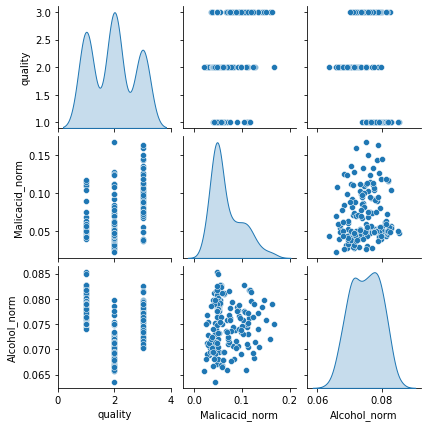

In [127]:
sns.pairplot(df_wine_data,diag_kind='kde',height=2)
plt.show()

In [128]:
df_wine_data1=pd.read_csv("D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\wine_data_UCI.csv",usecols=use_cols)
df_wine_data1

,quality,Alcohol,Malicacid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [129]:
df_wine_data1=(df_wine_data1-df_wine_data1.min())/(df_wine_data1.max()-df_wine_data1.min())

In [130]:
df_wine_data1

,quality,Alcohol,Malicacid
0,0.0,0.842105,0.191700
1,0.0,0.571053,0.205534
2,0.0,0.560526,0.320158
3,0.0,0.878947,0.239130
4,0.0,0.581579,0.365613
...,...,...,...
173,1.0,0.705263,0.970356
174,1.0,0.623684,0.626482
175,1.0,0.589474,0.699605
176,1.0,0.563158,0.365613


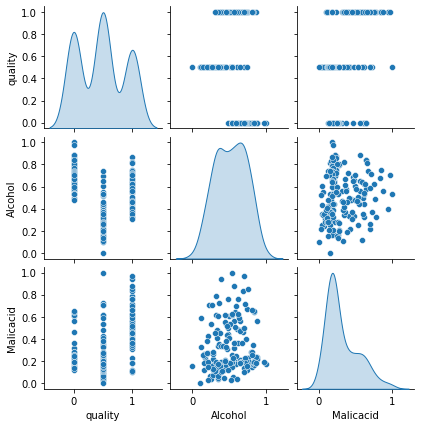

In [131]:
sns.pairplot(df_wine_data1,diag_kind='kde',height=2)
plt.show()